# Problema 1: Implementación del Metodo Simplez Estandar

Implementar el metodo Simplex estándar para resolver el siguiente problema:

$$
\begin{aligned}
\text{Maximizar} \quad & Z = 3x_1 + 2x_2 + 5x_3 \\
\text{sujeto a} \quad & x_1 + x_2 + x_3 \leq 100 \\
& 2x_1 + x_2 + x_3 \leq 150 \\
& x_1 + 4x_2 + 2x_3 \leq 80 \\
& x_1, x_2, x_3 \geq 0
\end{aligned}
$$

## 1. Convertir el problema a la forma estandar introduciendo variables de holgura

$$
Z = 3x_1 + 2x_2 + 5x_3 + 0s_1 + 0s_2 + 0s_3 \\
x_1 + x_2 + x_3 + s_1 = 100 \\
2x_1 + x_2 + x_3 + s_2 = 150 \\
x_1 + 4x_2 + 2x_3 + s_3 = 80 \\
x_1, x_2, x_3, s_1, s_2, s_3 \geq 0
$$

## 2. Implementar el Algoritmo del Metodo Simplex desde Cero en Python

In [3]:
import numpy as np

def simplex(table, m, n):
    """
    Implementación del método Simplex estándar.

    Parámetros:
      table: Matriz numpy que representa el table inicial.
      m: Número de filas correspondientes a las restricciones.
      n: Número de columnas correspondientes a las variables (sin contar la columna del lado derecho).

    Retorna:
      table: table final tras la ejecución del método.
      basic_vars: Lista con los índices de las variables básicas finales.
    """
    # Suponemos que inicialmente las variables de holgura son las básicas.
    basic_vars = list(range(n - m, n))
    iteration = 0

    while True:
        iteration += 1
        
        print(f"\nIteración: {iteration}")
        print(table)
        
        # Se extrae la fila objetivo
        objective_row = table[m, :n]
        if all(objective_row >= 0):
            break

        # Selección de la variable de entrada: columna con el coeficiente más negativo.
        pivot_col = np.argmin(objective_row)

        # Calcular ratios para determinar la fila pivote
        ratios = []
        for i in range(m):
            if table[i, pivot_col] > 0:
                ratios.append(table[i, n] / table[i, pivot_col])
            else:
                ratios.append(np.inf)
        ratios = np.array(ratios)
        pivot_row = np.argmin(ratios)

        # Operación de pivoteo:
        # Normalizamos la fila pivote para que el elemento pivote se haga 1.
        pivot_element = table[pivot_row, pivot_col]
        table[pivot_row, :] /= pivot_element

        # Actualizar el resto de las filas para tener ceros en la columna pivote.
        for i in range(m + 1):
            if i != pivot_row:
                table[i, :] -= table[i, pivot_col] * table[pivot_row, :]

        # Actualización de la base: reemplazar la variable básica saliente por la entrante.
        basic_vars[pivot_row] = pivot_col

    return table, basic_vars

## 3. Inicializar la Solución Básica Factible Utilizando las Variables de Holgura

In [5]:
# Definir los coeficientes de la función objetivo para las variables: x1, x2, x3, s1, s2, s3.
c = np.array([3, 2, 5, 0, 0, 0], dtype=float)

# Definir la matriz A de las restricciones, ya incluyendo las variables de holgura:
# La estructura es: [x1, x2, x3, s1, s2, s3]
A = np.array([
    [1, 1, 1, 1, 0, 0],   # x1 + x2 + x3 + s1 = 100
    [2, 1, 1, 0, 1, 0],   # 2x1 + x2 + x3 + s2 = 150
    [1, 4, 2, 0, 0, 1]    # x1 + 4x2 + 2x3 + s3 = 80
], dtype=float)

# Vector b con los términos independientes
b = np.array([100, 150, 80], dtype=float)

# Número de restricciones y de variables totales
m, n = A.shape  # m = 3 restricciones y n = 6 variables

# Construir la table para el método Simplex:
# - Se crean m + 1 filas (una para cada restricción y una fila para la función objetivo)
# - Se crean n + 1 columnas (una por cada variable y una columna para el término independiente)
table_inicial = np.zeros((m + 1, n + 1))

# Rellenar el table:
# Las primeras m filas se completan con la matriz A y el vector b
table_inicial[:m, :n] = A
table_inicial[:m, n] = b

# La última fila corresponde a la función objetivo:
# Para un problema de maximización se coloca -c en el table
table_inicial[m, :n] = -c

# Con este table, la solución básica factible inicial queda:
# - Variables originales (x1, x2, x3) = 0
# - Variables de holgura (s1, s2, s3) = 100, 150 y 80 respectivamente.
print("Table inicial con la solución básica factible:")
print(table_inicial)


Table inicial con la solución básica factible:
[[  1.   1.   1.   1.   0.   0. 100.]
 [  2.   1.   1.   0.   1.   0. 150.]
 [  1.   4.   2.   0.   0.   1.  80.]
 [ -3.  -2.  -5.  -0.  -0.  -0.   0.]]


## 4. Elaborar la Tabla Simplex Inicial y Mostrar cada Iteración del Algoritmo

Luego de ejecutar la inicializacion de la tabla Simplex Inicial, esta se ve así

| **Básica** | **$x_1$** | **$x_2$** | **$x_3$** | **$s_1$** | **$s_2$** | **$s_3$** | **Solución** |
|----------|------|------|------|------|------|------|------------|
| **z**    | -3     | -2     | -5     | 0      | 0      | 0      | 0            |
| **$s_1$**   | 1      | 1      | 1      | 1      | 0      | 0      | 100          |
| **$s_2$**   | 2      | 1      | 1      | 0      | 1      | 0      | 150          |
| **$s_3$**   | 1      | 4      | 2      | 0      | 0      | 1      | 80           |


Seguido de esto, se comienza la iteración del algoritmo, mostrando cada iteración realizada

In [6]:

# Ejecutar el método Simplex mostrando cada iteración
table_final, basic_vars = simplex(table_inicial, m, n)

print("\nTabla Final:")
print(table_final)


Iteración: 1
[[  1.   1.   1.   1.   0.   0. 100.]
 [  2.   1.   1.   0.   1.   0. 150.]
 [  1.   4.   2.   0.   0.   1.  80.]
 [ -3.  -2.  -5.  -0.  -0.  -0.   0.]]

Iteración: 2
[[  0.5  -1.    0.    1.    0.   -0.5  60. ]
 [  1.5  -1.    0.    0.    1.   -0.5 110. ]
 [  0.5   2.    1.    0.    0.    0.5  40. ]
 [ -0.5   8.    0.    0.    0.    2.5 200. ]]

Iteración: 3
[[  0.          -0.66666667   0.           1.          -0.33333333
   -0.33333333  23.33333333]
 [  1.          -0.66666667   0.           0.           0.66666667
   -0.33333333  73.33333333]
 [  0.           2.33333333   1.           0.          -0.33333333
    0.66666667   3.33333333]
 [  0.           7.66666667   0.           0.           0.33333333
    2.33333333 236.66666667]]

Tabla Final:
[[  0.          -0.66666667   0.           1.          -0.33333333
   -0.33333333  23.33333333]
 [  1.          -0.66666667   0.           0.           0.66666667
   -0.33333333  73.33333333]
 [  0.           2.33333333   1. 

Luego de la iteración final, se obtiene la siguente tabla

| **Básica** | **$x_1$** | **$x_2$** | **$x_3$** | **$s_1$** | **$s_2$** | **$s_3$** | **Solución** |
|----------|------|------|------|------|------|------|------------|
| **$s_1$**   |  0     | -0.666667   |  0     |  1     | -0.333333 | -0.333333  | 23.333333    |
| **$x_1$**   |  1     | -0.666667   |  0     |  0     |  0.666667 | -0.333333  | 73.333333    |
| **$x_3$**   |  0     |  2.333333   |  1     |  0     | -0.333333 |  0.666667  |  3.333333    |
| **z**    |  0     |  7.666667   |  0     |  0     |  0.333333 |  2.333333  | 236.666667   |


## 5. Identificar la solución óptima y el valor de la función objetivo

Luego de analizar el resultado del metodo simplex, la solución optima sería $s_1 = 23.33, \; x_1 = 73.33, \; x_3 = 3.33$ y el valor de la función objetivo seria de $z = 236.66$

## 6. Interpretar geométricamente la solución en el espacio de variables originale

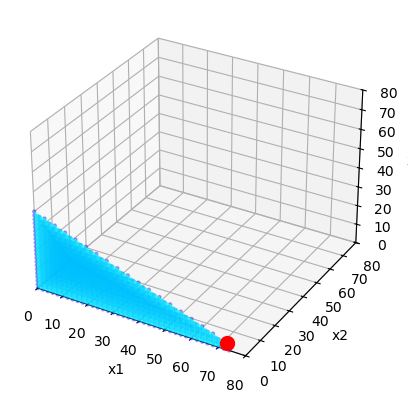

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull

x1 = np.linspace(0, 80, 41)
x2 = np.linspace(0, 80, 41)
x3 = np.linspace(0, 80, 41)
X1, X2, X3 = np.meshgrid(x1, x2, x3)
pts = np.vstack([X1.ravel(), X2.ravel(), X3.ravel()]).T
feasible = pts[(pts[:,0] + pts[:,1] + pts[:,2] <= 100) & 
               (2*pts[:,0] + pts[:,1] + pts[:,2] <= 150) &
               (pts[:,0] + 4*pts[:,1] + 2*pts[:,2] <= 80)]
hull = ConvexHull(feasible)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feasible[:,0], feasible[:,1], feasible[:,2], s=5, color='blue', alpha=0.3)
faces = [feasible[simplex] for simplex in hull.simplices]
poly = Poly3DCollection(faces, alpha=0.5, facecolor='cyan')
ax.add_collection3d(poly)
ax.scatter([73.33], [0], [3.33], s=100, color='red')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_xlim(0, 80)
ax.set_ylim(0, 80)
ax.set_zlim(0, 80)
plt.show()

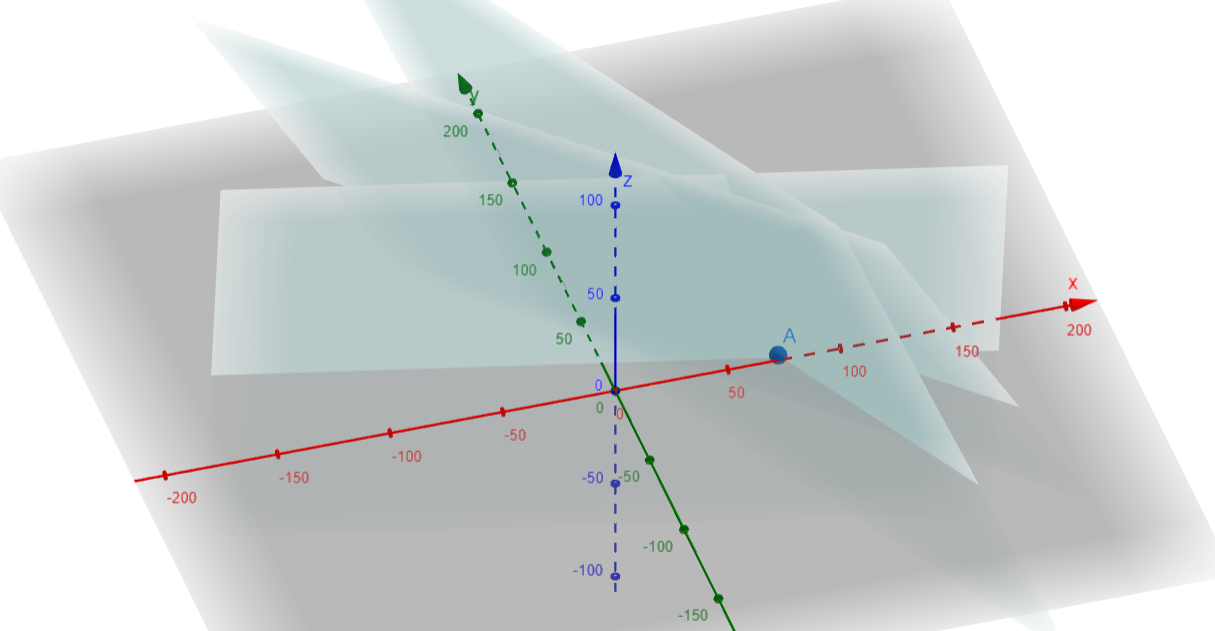

Con esta visualización, podemos ver graficamente el punto optimo de nuestra función objetivo

## 7. Incluir un análisis de sensibilidad básico para entender cómo pequeños cambios en los coeficientes de la función objetivo o en los términos independientes afectan la solución

Para realizar este análisis primero visualicemos nuestra solución optima, función objetivo y restricciones con sus respectivas variables de holgura

$$
Z = 3x_1 + 2x_2 + 5x_3\\
x_1 + x_2 + x_3 + s_1 = 100 \quad (1)\\
2x_1 + x_2 + x_3 + s_2 = 150 \quad (2)\\
x_1 + 4x_2 + 2x_3 + s_3 = 80 \quad (3)\\
x_1, x_2, x_3, s_1, s_2, s_3 \geq 0 \\
\quad\\
\text{Donde la solución optima es:} \\
x_1 = 73.33 \\
x_3 = 3.33\\
s_1 = 23.33\\
Z = 236.66\\
$$

Con esto en mente, vamos a analizar inicialmente las variables de holgura y sus shadow prices. Podemos ver que la unica variable de olgura con un valor diferente de 0 es $s_1$. Esto nos indica que la restricción 1 no es activa y no está limitando a la función. Por ende su shadow price seria de 0 y cualquier modificación en esta restriccion no tendria mayor impacto en el resultado final de la función objetivo. Por otro lado, las variables de holgura $s_2$ y $s_3$ son iguales a cero, indicando que las restricciones 2 y 3 si son restricciones activas (están limitando la función) y el shadow price respectivo de cada restricción nos indicaria cuanto aumentaria la función objetivo con la modificación de estas restricciones. Con base en esto, procederemos a realizar un análisis para las restricciones 2 y 3.

Si aumentamos el valor de la restriccion 2 en una unidad, $150 \Rightarrow 151$, obtenemos que $Z_G \approx 236.99$. Con esto podemos analizar lo siguente:

$$
\nabla Z = \frac{Z_G - Z_C}{151-150} = \frac{236.99 - 236.66}{1} = 0.33
$$

Con esto podemos concluir que por cada unidad que aumente la restriccion 2, la función objetivo va a aumentar 0.33 unidades.


Ahora realizaremos el mismo análisis para la restricción 3, en donde aumentaremos la restriccion nuevamente en una unidad, $80 \Rightarrow 81$, obtenemos que $Z_G \approx 238.99$. Con esto podemos analizar lo siguiente:

$$
\nabla Z = \frac{Z_G - Z_C}{81-80} = \frac{238.99 - 236.66}{1} = 2.33
$$

Con esto podemos concluir que con cada unidad que aumente la restricción 3, la función objetivo aumentará en 2.33 unidades.